In [31]:
import torch 
from torch import nn
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from torchvision import transforms as T
import matplotlib.pyplot as plt
import albumentations as A
from torchvision import io as read_image
import glob
import os
import sys
import cv2

In [4]:
path_clean = 'imgs'
# path_noisy = 'imgs'

In [5]:
clean_fl = glob.glob(path_clean+'/clean/*')
# noisy_fl = glob.glob(path_noisy)

In [300]:
noising = A.Compose([
            # A.transforms.Blur(always_apply=False, p=.2),
            # A.transforms.GaussNoise(var_limit=(0, .02), 
            #                         always_apply=False, p=.2),
            # A.transforms.RandomFog(fog_coef_lower=1, fog_coef_upper=1, 
            #                        alpha_coef=0.4, 
            #                        always_apply=False, p=0.5),
            # A.transforms.RandomShadow(shadow_roi=(0, 0, 1, 1), num_shadows_lower=1, 
            #                           num_shadows_upper=2, shadow_dimension=2, 
            #                           always_apply=False, p=0.9),
            A.transforms.RandomSnow(snow_point_lower=0.1, snow_point_upper=0.2, 
                                    brightness_coeff=1.5, 
                                    always_apply=False, p=0.9)
        ])

In [306]:
clean_fl[0][clean_fl[0].rfind('/')+1:]

'Highway_1807.jpg'

In [307]:
for img in clean_fl:
    image = cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB)
    noised_image = noising(image=cv2.cvtColor(cv2.imread(clean_fl[1]), cv2.COLOR_BGR2RGB))
    cv2.imwrite(img[img.rfind('/')+1:])

In [301]:
image = cv2.cvtColor(cv2.imread(clean_fl[1]), cv2.COLOR_BGR2RGB)
noised_image = noising(image=cv2.cvtColor(cv2.imread(clean_fl[1]), cv2.COLOR_BGR2RGB))

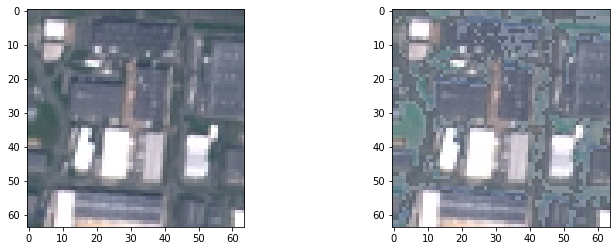

In [302]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].imshow(image)
ax[1].imshow(noised_image['image'])

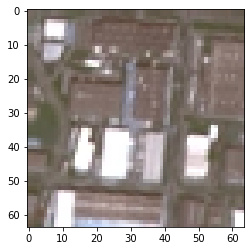

In [226]:
plt.imshow((cv2.imread(clean_fl[1])/255).astype(np.float32))

In [208]:
cv2.imwrite('a.jpg', noising(image=(cv2.imread(clean_fl[1])/255).astype(np.float32))['image']*255)

True

In [7]:
noisy = torch.Tensor(799, 5000, 80)
clean = torch.Tensor(799, 5000, 80)
torch.cat(X_noisy, out=noisy)
torch.cat(X_clean, out=clean)

tensor([[[-0.5693, -0.6226, -0.6748,  ..., -0.8882, -0.9336, -0.8809],
         [-0.2898, -0.6172, -0.8584,  ..., -0.8833, -0.9038, -0.9019],
         [-0.0802, -0.2351, -0.8296,  ..., -0.8789, -0.9224, -0.8657],
         ...,
         [-0.6504, -0.6870, -0.8384,  ..., -0.8682, -0.9341, -0.8779],
         [-0.8228, -0.7979, -0.8789,  ..., -0.9229, -0.8950, -0.8882],
         [-0.4226, -0.5537, -0.5938,  ..., -0.9238, -0.8838, -0.9312]],

        [[ 0.1233,  0.3376,  0.3787,  ..., -0.6152, -0.5107, -0.4734],
         [-0.0367,  0.2773,  0.3411,  ..., -0.3584, -0.2766, -0.1720],
         [-0.0432,  0.1691,  0.2443,  ..., -0.5449, -0.4600, -0.4309],
         ...,
         [ 0.1893,  0.3589,  0.4275,  ..., -0.4995, -0.4631, -0.5151],
         [ 0.2209,  0.3521,  0.4851,  ..., -0.4998, -0.4653, -0.4868],
         [ 0.0740,  0.3354,  0.4404,  ..., -0.3940, -0.4390, -0.4893]],

        [[ 0.3718,  0.3015,  0.2122,  ...,  0.0665,  0.0829,  0.0744],
         [ 0.2432,  0.2042,  0.1515,  ...,  0

In [8]:
dataset = TensorDataset(noisy.unsqueeze(1), clean.unsqueeze(1))

In [9]:
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

In [13]:
class DenoisingBaseLine(nn.Module):
    def __init__(self):
        super().__init__()


        # encoder
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 64, 3),
            nn.Tanh()            
        )
        self.pool = nn.MaxPool2d(2, return_indices=True)


        # decoder
        self.unpool = nn.MaxUnpool2d(2)
        self.upsample1 = nn.Sequential(
            nn.ConvTranspose2d(64, 1, 3),
            nn.Tanh()
            
        )


    def forward(self, x):

        x = self.conv1(x)
        x, indicies = self.pool(x)

        print(x.shape)
        x = self.unpool(x, indicies)
        x = self.upsample1(x)
        print(x.shape)



model = DenoisingBaseLine()
# model

In [11]:
next(iter(dataloader))[0].shape

torch.Size([64, 1, 5000, 80])

In [14]:
model(next(iter(dataloader))[0])

ValueError: too many values to unpack (expected 2)